<img src="https://www.gov.br/cbpf/pt-br/nucleo-de-comunicacao-social/cbpf.png"  width="500" />

<font size="5"> Tutorial Rede Neural Convolucional - Convolutional Neural Network (CNN)
<font size="2">



    
---
  
    This code was developed by Phelipe Darc.

---

<a href="phelipedarc.github.io">phelipedarc.github</a>
    
**Contact:** phelipedarc@cbpf.br</font>

<font size="2">

Please do not remove this disclaimer.</font>

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
## Carregando o Conjunto de Dados

* Vamos utilizar o conjunto de dados **MNIST**, que contém **70.000 imagens de dígitos manuscritos** (de 0 a 9), em tons de cinza, com tamanho 28x28 pixels.
* O dataset é amplamente utilizado para treinar e testar algoritmos de classificação de imagens.
* Ele já está disponível diretamente nas bibliotecas do Keras, o que facilita seu carregamento sem precisar fazer download manual.



Conjunto de treino: (60000, 28, 28)
Conjunto de teste: (10000, 28, 28)


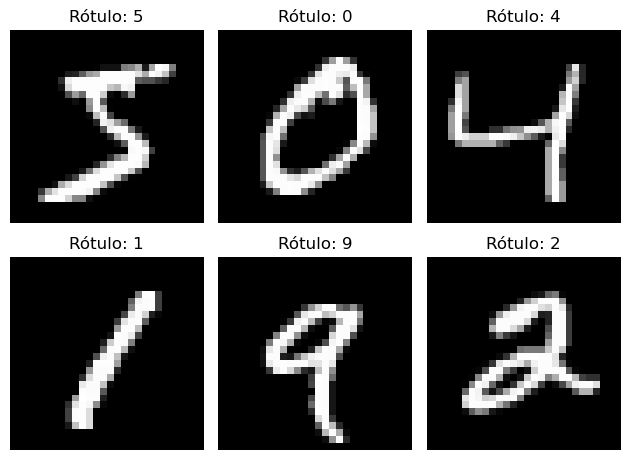

In [54]:
# Carregando o conjunto de dados MNIST diretamente do Keras
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Conjunto de treino:', x_train.shape)
print('Conjunto de teste:', x_test.shape)
# Visualizando os primeiros exemplos
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Rótulo: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [55]:
y_train.shape, X_train.shape

((60000,), (8100, 28, 28, 1))

In [56]:
# put labels into y_train variable
Y_train =pd.DataFrame(y_train[:10000])
# Drop 'label' column
X_train =x_train[:10000]

X_test = x_test
Y_test =pd.DataFrame(y_test)

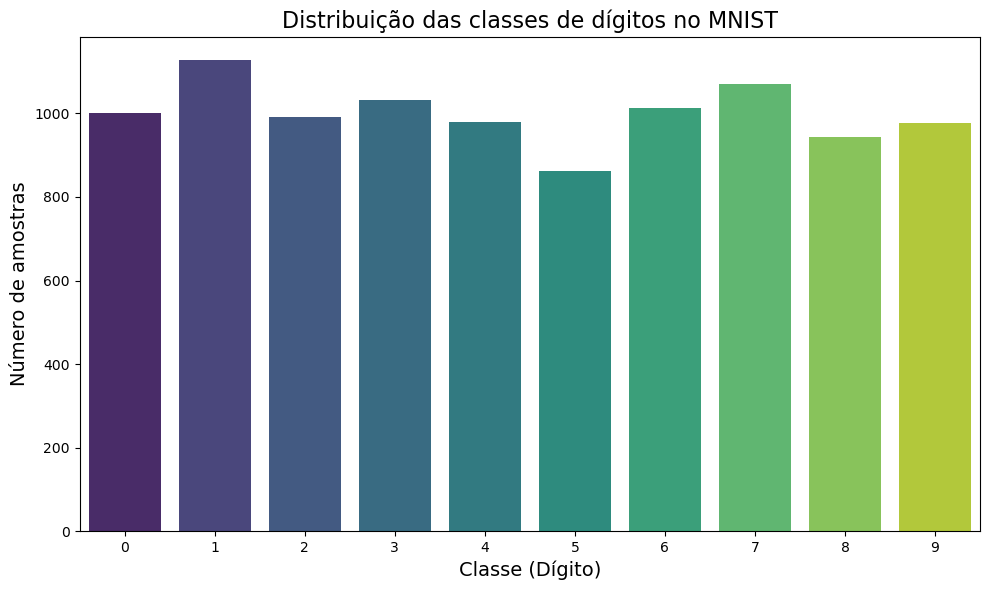

In [57]:
# Garantir que Y_train seja 1D
Y_train_flat = np.ravel(Y_train)  # ou Y_train.squeeze()

# Contar o número de instâncias por classe
class_counts = pd.Series(Y_train_flat).value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

plt.title("Distribuição das classes de dígitos no MNIST", fontsize=16)
plt.xlabel("Classe (Dígito)", fontsize=14)
plt.ylabel("Número de amostras", fontsize=14)


plt.tight_layout()
plt.show()

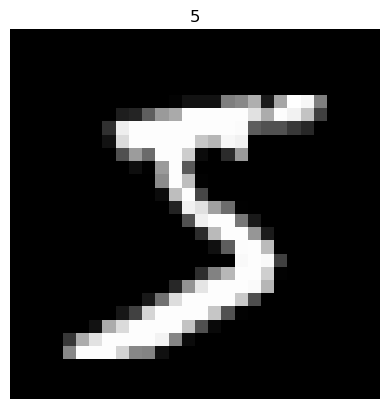

In [58]:
# plot some samples
img = X_train[0]
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_train[0])
plt.axis("off")
plt.show()

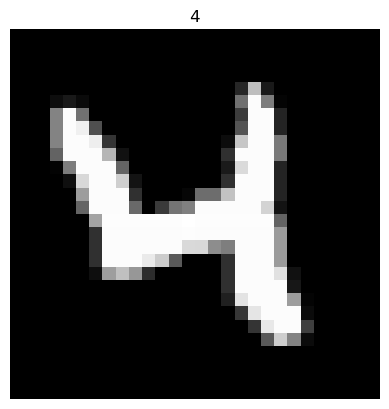

In [59]:
# plot some samples
img = X_train[20]
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_train[20])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalização, Redimensionamento e Codificação de Rótulos 

* **Normalização**
    * Realizamos uma normalização em tons de cinza para reduzir os efeitos de variações na iluminação.
    * Quando aplicamos normalização, a CNN funciona de forma mais rápida e eficiente.

* **Redimensionamento**
    * As imagens de treino e teste possuem tamanho 28 x 28.
    * Precisamos redimensionar todos os dados para matrizes 3D no formato 28x28x1.
    * O Keras exige uma dimensão extra no final, que corresponde aos canais da imagem. Como nossas imagens são em escala de cinza, usamos apenas um canal.

* **Codificação de Rótulos (Label Encoding)**  
    * Codificamos os rótulos em vetores one-hot:
        * 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
        * 4 => [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [60]:
x_train[0].max(), x_train[0].min(), 

(np.uint8(255), np.uint8(0))

In [61]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

x_train shape:  (10000, 28, 28)
test shape:  (10000, 28, 28)


In [62]:
# Mostrando o formato dos dados
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

x_train shape:  (10000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)


In [63]:
# Label Encoding
from tensorflow.keras.utils import to_categorical# convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train.shape

(10000, 10)

In [64]:
Y_train[0],Y_train[20]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]))

## Divisão em Treinamento e Validação

* Dividimos os dados em conjuntos de treinamento e validação.
* O tamanho do conjunto de val é de 10% (Você decide).
* O conjunto de treinamento corresponde a 90% dos dados.

In [65]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (9000, 28, 28, 1)
x_test shape (1000, 28, 28, 1)
y_train shape (9000, 10)
y_test shape (1000, 10)


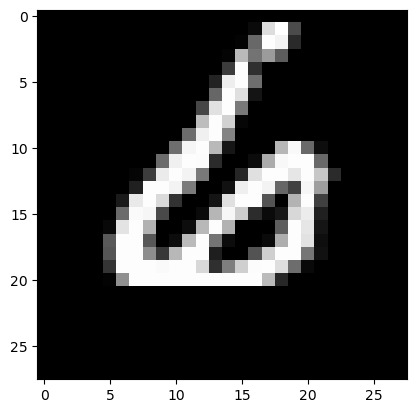

In [66]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

<a id="4"></a>
## Rede Neural Convolucional 
* CNN is used for image classification, object detection 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### O que é a Operação de Convolução?

* Temos uma imagem e um detector de características (ex: matriz 3x3).
* O detector de características não precisa ser uma matriz 3x3 — pode ser 5x5, 7x7, etc.
* Detector de características = kernel = filtro
* O detector de características identifica padrões como bordas ou formas curvas.  
  Exemplo: se a imagem de entrada for de um cachorro, o detector pode identificar orelhas ou cauda.
* Mapa de características = convolução(imagem de entrada, detector de características). Ou seja, multiplicação elemento a elemento entre matrizes.
* Mapa de características = feature map = resultado da convolução.
* Stride = deslocamento do filtro sobre a imagem de entrada.
* A convolução geralmente reduz o tamanho da imagem. Isso é importante porque acelera o processamento, porém pode haver perda de informação.
* Criamos vários mapas de características pois usamos múltiplos detectores (filtros) diferentes.
* Exemplo no GIMP: filtro de detecção de bordas →  
  `[0, 10, 0], [10, -4, 10], [0, 10, 0]`
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* Após a camada de convolução, aplicamos a função ReLU para quebrar a linearidade e aumentar a não linearidade do modelo — afinal, imagens são naturalmente não lineares.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Preenchimento (Padding) Igual

* Quando aplicamos várias camadas de convolução, o tamanho do volume (imagem) vai diminuindo rapidamente — mais do que gostaríamos.
* Nas camadas iniciais da rede, queremos preservar o máximo possível de informações da imagem original para extrair características de baixo nível (como bordas e texturas).
* O preenchimento (padding) igual adiciona bordas artificiais à imagem, de modo que o tamanho da entrada e da saída seja o mesmo.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>


<a id="7"></a>
### Agrupamento Máximo (Max Pooling)

* Realiza uma redução de amostragem (down-sampling ou sub-sampling), ou seja, diminui a resolução da imagem.
* Ajuda a tornar a detecção de características invariantes a mudanças de escala ou orientação.
* Reduz a quantidade de parâmetros e o custo computacional da rede, ajudando também a controlar o overfitting.
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### Flattening
* Faz com que a imagem vire um Vetor de 1D
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Camada Totalmente Conectada (Full Connection)

* Os neurônios em uma camada totalmente conectada possuem conexões com **todas** as ativações da camada anterior.
* Essa é a estrutura clássica de uma **Rede Neural Artificial (ANN - Artificial Neural Network)**.
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

<a id="10"></a>
## Implementando com Tensorflow + Keras

### Criar o Modelo

* Arquitetura da rede:  
  **Convolução ⇒ Max Pooling ⇒ Dropout ⇒ Convolução ⇒ Max Pooling ⇒ Dropout ⇒ Camadas totalmente conectadas (2 camadas)**

* **Dropout**: Técnica onde **neurônios são ignorados aleatoriamente durante o treinamento**, o que ajuda a evitar overfitting e melhora a generalização do modelo.

* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>


In [69]:
# 
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical  # ✅ Forma correta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()
# 
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

I0000 00:00:1753709985.431429     398 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46213 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:4f:00.0, compute capability: 8.6
I0000 00:00:1753709985.433820     398 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46744 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:52:00.0, compute capability: 8.6
I0000 00:00:1753709985.436161     398 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 46744 MB memory:  -> device: 2, name: NVIDIA RTX A6000, pci bus id: 0000:56:00.0, compute capability: 8.6
I0000 00:00:1753709985.438369     398 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 46744 MB memory:  -> device: 3, name: NVIDIA RTX A6000, pci bus id: 0000:57:00.0, compute capability: 8.6
I0000 00:00:1753709985.441143     398 gpu_device.cc:2019] Created device /job:localh

<a id="12"></a>
### Definir Otimizador

* **Otimizador Adam**: Utiliza uma taxa de aprendizado adaptativa que é ajustada automaticamente durante o treinamento ou Fixa durante o treinamento.  
* Permite que a rede aprenda de forma mais eficiente e estável.

In [72]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001)

<a id="13"></a>
### Compilar o Modelo

* Utilizamos a função de **perda `categorical_crossentropy`**.
* Em exemplos anteriores (como em tutoriais de machine learning), usamos **`binary_crossentropy`**, adequada para problemas com apenas duas classes.
* Agora usamos **`categorical_crossentropy`** porque estamos lidando com um problema de **classificação multiclasse** (dígitos de 0 a 9).

* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


In [73]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="14"></a>
<a id="14"></a>
### Épocas e Tamanho do Lote (Batch Size)

* Suponha que você tenha um conjunto de dados com 10 exemplos (ou amostras).
* Se você definir um **batch size (tamanho do lote)** de 2 e quiser que o algoritmo execute por 3 **épocas**, isso significa:
  * Em cada época, o conjunto será dividido em **5 lotes** (10 / 2 = 5).
  * Cada lote será passado pelo algoritmo de treinamento.
  * Portanto, temos **5 iterações por época**.

🔗 Referência: [Epoch vs Iteration - StackOverflow](https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks)


In [75]:
epochs = 10  # para melhor resultados, aumente o numero de epocas
batch_size = 250

<a id="15"></a>
<a id="15"></a>
### Aumento de Dados (Data Augmentation)

* Para evitar o problema de **overfitting**, precisamos **expandir artificialmente** nosso conjunto de dados de dígitos manuscritos.
* Fazemos isso alterando os dados de treinamento com **pequenas transformações**, simulando variações reais na escrita.
* Exemplos de variações comuns:
  * O número pode estar **descentralizado**.
  * A **escala** pode variar (pessoas que escrevem números grandes ou pequenos).
  * A imagem pode estar **rotacionada**.

 <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>

In [78]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # não centraliza os dados com base na média de todo o conjunto
        samplewise_center=False,  # não centraliza cada amostra individualmente
        featurewise_std_normalization=False,  # não normaliza usando o desvio padrão do conjunto
        samplewise_std_normalization=False,  # não normaliza cada amostra com seu próprio desvio padrão
        zca_whitening=False,  # não aplica redução de dimensionalidade com ZCA whitening
        rotation_range=5,  # gira aleatoriamente as imagens até 5 graus
        zoom_range = 0.1, # aplica zoom aleatório de até 10%
        width_shift_range=0.1,  # desloca horizontalmente até 10% da largura
        height_shift_range=0.1,  # desloca verticalmente até 10% da altura
        horizontal_flip=False,  # não faz espelhamento horizontal
        vertical_flip=False)  # não faz espelhamento vertical

datagen.fit(X_train)  # aplica o aumento de dados ao conjunto de treino


<a id="16"></a>
### Fit the model

In [79]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


I0000 00:00:1753710326.839310     896 service.cc:152] XLA service 0x7ad3440037b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753710326.839367     896 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1753710326.839377     896 service.cc:160]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1753710326.839384     896 service.cc:160]   StreamExecutor device (2): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1753710326.839390     896 service.cc:160]   StreamExecutor device (3): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1753710326.839396     896 service.cc:160]   StreamExecutor device (4): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1753710326.839402     896 service.cc:160]   StreamExecutor device (5): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1753710326.839408     896 service.cc:160]   StreamExecutor device (6): NVID

 3/36 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.0858 - loss: 2.3454 

I0000 00:00:1753710335.684208     896 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2479 - loss: 2.1220

2025-07-28 13:45:39.310964: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_92', 4 bytes spill stores, 4 bytes spill loads



36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 190ms/step - accuracy: 0.2510 - loss: 2.1152 - val_accuracy: 0.7810 - val_loss: 0.8848
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.5761 - loss: 1.2655 - val_accuracy: 0.8840 - val_loss: 0.4935
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6886 - loss: 0.9168 - val_accuracy: 0.9170 - val_loss: 0.2979
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.7850 - loss: 0.6674 - val_accuracy: 0.9460 - val_loss: 0.2013
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8277 - loss: 0.5455 - val_accuracy: 0.9550 - val_loss: 0.1662
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.8582 - loss: 0.4582 - val_accuracy: 0.9640 - val_loss: 0.1370
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.8698 - loss: 0.4219 - val_accuracy: 0.9680 - val_loss: 0.1278
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.8805 - loss: 0.3872 - val_accuracy: 0.9720 - val_loss: 

<a id="17"></a>
### Avaliar o Modelo

* Após o treinamento, precisamos **avaliar o desempenho do modelo** usando o conjunto de teste (dados que ele nunca viu antes).
* A avaliação é importante para sabermos se o modelo está generalizando bem ou se ele apenas "decorou" os dados de treino (overfitting).

#### 🔹 Visualização da Perda no Teste (Test Loss)
* A função de **perda** (loss) mede o quanto as previsões do modelo estão distantes dos valores reais.
* Uma perda baixa indica que o modelo está acertando bem as previsões.
* Ao visualizar a perda ao longo das épocas, podemos identificar se:
  - O modelo está aprendendo (perda diminuindo).
  - Há overfitting (a perda de validação começa a aumentar enquanto a de treino continua diminuindo).

#### 🔹 Matriz de Confusão (Confusion Matrix)
* A matriz de confusão nos mostra quantas **previsões corretas e incorretas** o modelo fez para cada classe.
* Cada linha representa os **rótulos verdadeiros** e cada coluna as **previsões do modelo**.
* Idealmente, todos os valores estariam na diagonal principal (previsões corretas).
* Ela é muito útil para entender **quais dígitos o modelo mais confunde entre si**.

📌 Exemplo: Se o modelo confunde muitos `5`s com `3`s, isso aparecerá fora da diagonal principal da matriz.

Essas ferramentas são essenciais para validar e interpretar os resultados de redes neurais.


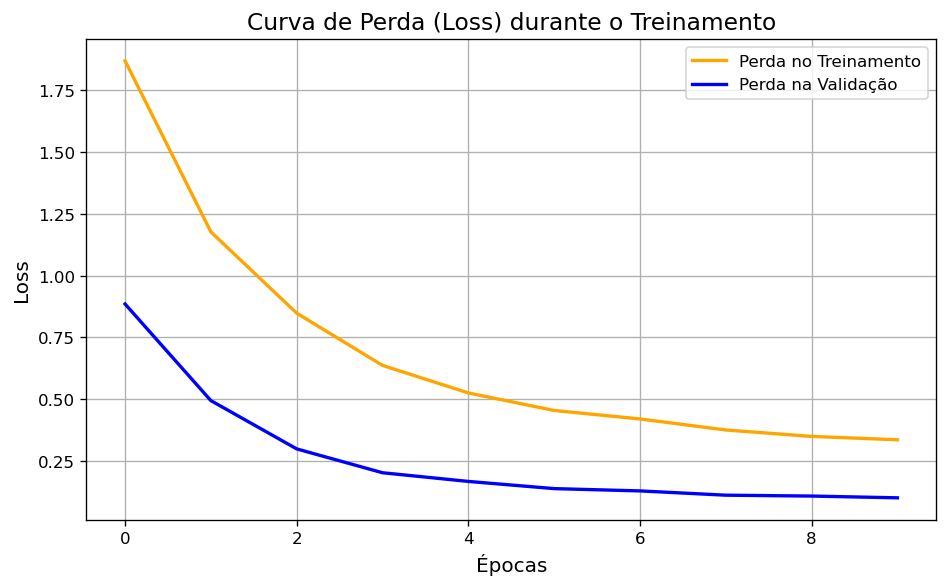

In [86]:
# Plotando a curva de perda (loss) para treino e validação
plt.figure(figsize=(8, 5), dpi=120)
plt.plot(history.history['loss'], label='Perda no Treinamento', color='orange', linewidth=2)
plt.plot(history.history['val_loss'], label='Perda na Validação', color='blue', linewidth=2)
plt.title("Curva de Perda (Loss) durante o Treinamento", fontsize=14)
plt.xlabel("Épocas", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


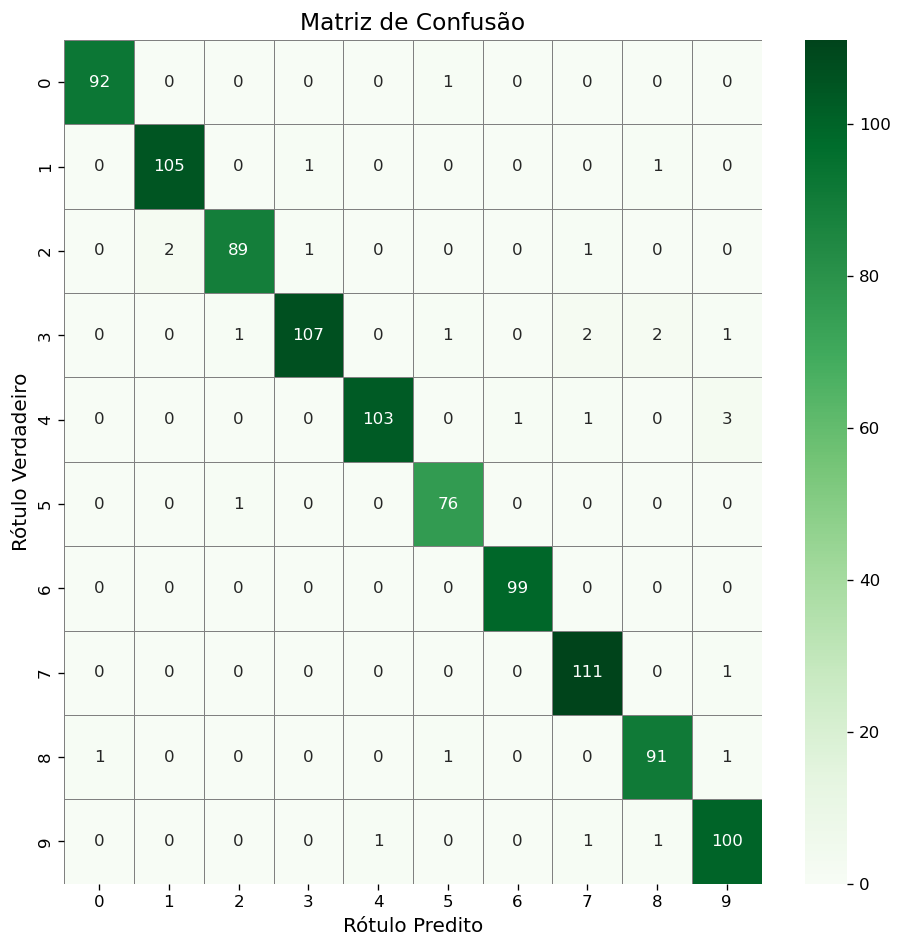

In [85]:
# confusion matrix
import seaborn as sns
# Fazendo previsões no conjunto de validação
Y_pred = model.predict(X_val)

# Convertendo as previsões em rótulos (índice da classe com maior probabilidade)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convertendo os rótulos reais de one-hot encoding para rótulos inteiros
Y_true = np.argmax(Y_val, axis=1)

# Calculando a matriz de confusão
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plotando a matriz de confusão com seaborn
f, ax = plt.subplots(figsize=(8, 8), dpi=120)
sns.heatmap(confusion_mtx, annot=True, fmt='.0f', cmap="Greens", 
            linewidths=0.5, linecolor="gray", cbar=True, ax=ax)

plt.xlabel("Rótulo Predito", fontsize=12)
plt.ylabel("Rótulo Verdadeiro", fontsize=12)
plt.title("Matriz de Confusão", fontsize=14)
plt.tight_layout()
plt.show()

# Dataset de Teste

In [87]:
import matplotlib.pyplot as plt
import numpy as np

def mostrar_previsao(modelo, X_test, y_test, indice=0):
    """
    Mostra a imagem do dígito e a probabilidade prevista para cada classe (0 a 9).
    
    Parâmetros:
        modelo: modelo treinado (Keras)
        X_test: conjunto de imagens de teste (pré-processado)
        y_test: rótulos verdadeiros
        indice: índice da imagem a ser exibida
    """
    
    # Obtemos a imagem e o rótulo verdadeiro
    imagem = X_test[indice]
    verdadeiro = np.argmax(y_test[indice]) if y_test.ndim == 2 else y_test[indice]

    # Previsão da rede (probabilidades)
    imagem_input = np.expand_dims(imagem, axis=0)  # adiciona batch dimension
    probs = modelo.predict(imagem_input, verbose=0)[0]  # pega o vetor de probs

    # Mostra a imagem
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(imagem.squeeze(), cmap='gray')
    plt.title(f"Imagem Real: {verdadeiro}")
    plt.axis('off')

    # Mostra as probabilidades em gráfico de barras
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(10), probs, color='skyblue')
    plt.title("Probabilidades por Classe")
    plt.xlabel("Classe")
    plt.ylabel("Probabilidade")
    plt.xticks(np.arange(10))
    plt.ylim(0, 1)

    # Mostra a classe predita
    classe_predita = np.argmax(probs)
    plt.axvline(classe_predita, color='red', linestyle='--', label=f"Classe Prevista: {classe_predita}")
    plt.legend()

    plt.tight_layout()
    plt.show()


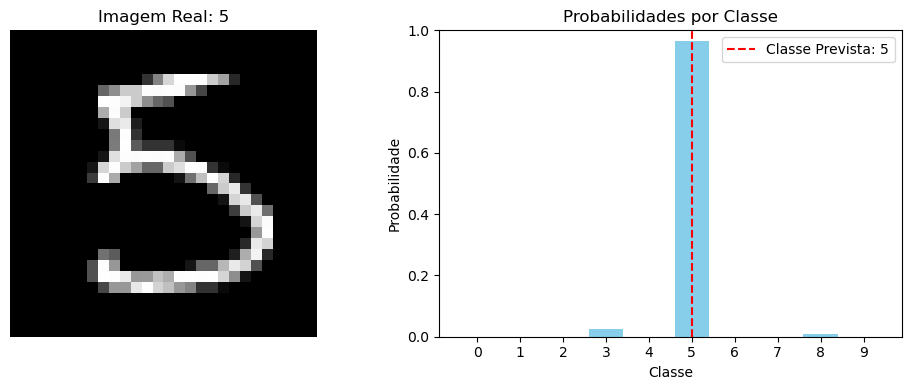

In [89]:
mostrar_previsao(model, X_test, y_test, indice=15)